# Demo: solving FizzBuzz with an MLP (Multi-Layer Perceptron)

### FizzBuzz is the following problem:

### For each of the numbers 1 to 100:
* if the number is divisible by 3, print "fizz"
* if the number is divisible by 5, print "buzz"
* if the number is divisible by 15, print "fizzbuzz"
* otherwise, just print the number

In [1]:
import numpy as np 
from dl_lib.train import train
from dl_lib.neural_net import NeuralNet
from dl_lib.layers import Linear, Tanh
from dl_lib.optim import SGD
from fizzbuzz import fizz_buzz_encode, binary_encode
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(255)

In [2]:
# Mapping. We expect to see targets[i] given inputs[i].
inputs = np.array([
    binary_encode(x)
    for x in range(101, 1024)
])

targets = np.array([
    fizz_buzz_encode(x)
    for x in range(101, 1024)
])

In [3]:
# Simple MLP (Multi-Layer Perceptron) neural network. 
mlp = NeuralNet([
    Linear(input_size=10, output_size=50),
    Tanh(),
    Linear(input_size=50, output_size=4)
])

loss_values = train(mlp,
                    inputs,
                    targets,
                    num_epochs=5000,
                    optimizer=SGD(lr=0.001))

epoch_nums = [n for n in range(1, len(loss_values) + 1)]

100%|██████████| 5000/5000 [00:25<00:00, 193.82it/s]


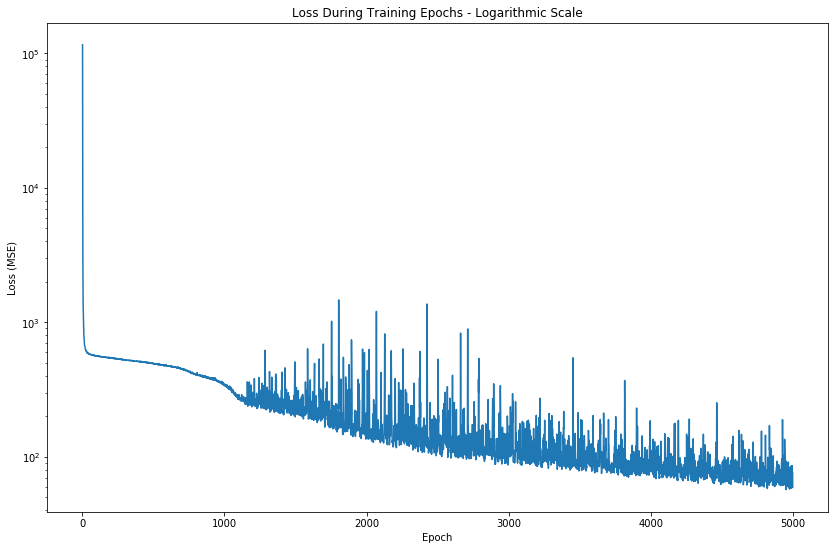

In [4]:
plt.figure(figsize=(14, 9))
plt.title("Loss During Training Epochs - Logarithmic Scale")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.yscale("log")
plt.plot(epoch_nums, loss_values);

In [5]:
# Testing FizzBuzz net on values from 1 to 100.
predicted_labels, actual_labels = [], []
for x in range(1, 101):
    predicted = mlp.forward(binary_encode(x))
    predicted_idx = np.argmax(predicted)
    actual_idx = np.argmax(fizz_buzz_encode(x))
    labels = [str(x), "fizz", "buzz", "fizzbuzz"]
    predicted_labels.append(predicted_idx)
    actual_labels.append(actual_idx)
    # print(x, labels[predicted_idx], labels[actual_idx])

accuracy_score(actual_labels, predicted_labels)

0.95

### This simple multi-layer perceptron achieves a 95% accuracy score on FizzBuzz given this particular random seed, set of parameters, and set of inputs. 